In [ ]:
%pip install xarray numpy matplotlib scipy pathlib pyocclient netCDF4

# Introduction

Throughout the workshop, we will work with electrophysiological data that was released by the Allen institute in 2019.[<sup>1</sup>](#fn1) Six Neuropixels probes recorded the extracellular potential across visual areas in 58 different mice while they were presented with a range of different visual stimuli. In this first notebook, you will get to familiarize yourself with the data we have extracted from one mouse in the Allen dataset while learning different tools and methods to visualize and explore the data.

The dataset used for this workshop is from a single mouse and contains the following:

- Extracellular potentials (ECP) and local field potentials (LFP) recorded in primary visual cortex (V1)
- Spikes from neurons recorded in V1, lateral geniculate nucleus (LGN) in the thalamus, and the lateromedial (LM) area of the visual cortex.
- Behavioral data: Average running speed and average pupil size in each trial.
- Meta data

The mouse was presented with a full-field flash (a white screen) lasting 250 ms at 1000 ms after trial start in every trial.

Run the cells below to download and load the dataset. You should see a table displaying the content of the dataset after it's loaded.

<span id="fn1"><sup>1</sup>Siegle, J. H., Jia, X., Durand, S., Gale, S., Bennett, C., Graddis, N., ... & Koch, C. (2021). Survey of spiking in the mouse visual system reveals functional hierarchy. Nature, 592(7852), 86-92. doi: https://doi.org/10.1038/s41586-020-03171-x</span>

## Download dataset

In [48]:
import owncloud
import os

if not os.path.exists('../../data'):
    print('Creating directory for data')
    os.mkdir('../../data')

if not os.path.exists('../../data/dataset_session_754312389.nc'):
    print('Downloading data')
    owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/ZAs9uJ1KzrWi0ra').get_file('/', '../../data/dataset_session_754312389.nc')
else:
    print('Dataset already downloaded')

Dataset already downloaded


### Load dataset

Run cells below to load dataset

In [49]:
import xarray as xr
from pathlib import Path
import numpy as np

In [50]:
loadpath = '../../data/dataset_session_754312389.nc'
dataset_path = Path(loadpath)

dataset = xr.load_dataset(dataset_path)
dataset

<xarray.Dataset> Size: 232MB
Dimensions:                             (channel_depth: 23,
                                         trial_stimulus_id: 75,
                                         time_from_stimulus_onset_lfp: 1875,
                                         time_from_stimulus_onset_csd: 1875,
                                         time_whole_rec: 373124,
                                         channel_depth_LM: 19,
                                         ...
                                         time_from_stimulus_onset_spikes: 1500,
                                         unit_id_V1: 91, unit_id_LM: 13,
                                         stimulus_start_times: 75,
                                         stimulus_stop_times: 75,
                                         channel_id: 23,
                                         time_from_stimulus_onset_lfp_trial: 1875)
Coordinates: (12/17)
  * channel_depth                       (channel_depth) int64 184B 0 ... -880
  * trial_stimulus_id                   (trial_stimulus_id) int32 300B 3649 ....
  * time_from_stimulus_onset_lfp        (time_from_stimulus_onset_lfp) float64 15kB ...
  * time_from_stimulus_onset_csd        (time_from_stimulus_onset_csd) float64 15kB ...
  * time_whole_rec                      (time_whole_rec) float64 3MB 1.286e+0...
  * channel_depth_LM                    (channel_depth_LM) int64 152B 0 ... -720
    ...                                  ...
  * unit_id_V1                          (unit_id_V1) int32 364B 951795075 ......
  * unit_id_LM                          (unit_id_LM) int32 52B 951791074 ... ...
  * stimulus_start_times                (stimulus_start_times) float64 600B 1...
  * stimulus_stop_times                 (stimulus_stop_times) float64 600B 1....
  * channel_id                          (channel_id) int32 92B 850144538 ... ...
  * time_from_stimulus_onset_lfp_trial  (time_from_stimulus_onset_lfp_trial) float64 15kB ...
Data variables:
    lfp_trials                          (channel_depth, trial_stimulus_id, time_from_stimulus_onset_lfp) float64 26MB ...
    csd_trials                          (channel_depth, trial_stimulus_id, time_from_stimulus_onset_csd) float64 26MB ...
    lfp_whole_recording                 (channel_depth, time_whole_rec) float64 69MB ...
    ecp_whole_recording                 (channel_depth, time_whole_rec) float64 69MB ...
    lfp_LM                              (channel_depth_LM, trial_stimulus_id_LM, time_from_stimulus_onset_LM_lfp) float64 11MB ...
    spike_counts_LGN                    (unit_id_LGN, trial_nr, time_from_stimulus_onset_spikes) int16 6MB ...
    spike_counts_V1                     (unit_id_V1, trial_nr, time_from_stimulus_onset_spikes) int16 20MB ...
    spike_counts_LM                     (unit_id_LM, trial_nr, time_from_stimulus_onset_spikes) int16 3MB ...
    pupil_width                         (trial_nr) float64 600B 39.12 ... 44.31
    run_speed                           (trial_nr) float64 600B 1.155 ... 1.711
Attributes:
    time_unit:                  millisecond
    lfp_unit:                   Volt
    channel_depth_unit:         micrometer
    note_channel_depth:         Measured in distance from electrode closest t...
    sampling_frequency_lfp:     1250
    sampling_frequency_spikes:  1000
    sampling_frequency_unit:    Hz

## Section 1

### Accessing and plotting spike and LFP data

In this first section, you will get some practice accessing data from different trials, cells, and channels and plotting it.

| Code | Description |
| :-- | :-- |
| `data[1, :]` | Get data on second row in 2D data array. |
| `data[:, 2]` | Get data on third column in 2D data array. |
| `data[1, 2]` | Get the single element on second row and third column in a 2D data array. |
| `np.mean(data, axis = (dim_num))` or `data.mean(axis = dim_num)` | Calculate the average of the data across the `dim_num` dimension of the array. |
| `np.shape(data)` or `data.shape` | Gives you the dimensions of the data. The output for ``data`` containing 20 channels on the first dimension, 50 trials, and 1000 time points would be (20,50,1000). `data.shape[2]` would give you the number of the **third** dimension (1000 in this example). |
| `plt.plot(x, y)` | Plot y values against x values. |

In [51]:
import matplotlib.pyplot as plt

**Example**: Extract the spike count data from LGN and put it in a variable named `spike_counts_LGN`. Display this variable. 

You should see an array with a lot of zeros (indicating no spikes at that time point) and some 1's (indicating a spike at that time point) as well as information about the number of units (that is, neurons), trials and time in each trial.

In [52]:
spike_counts_LGN = dataset['spike_counts_LGN']

spike_counts_LGN

<xarray.DataArray 'spike_counts_LGN' (unit_id_LGN: 27, trial_nr: 75,
                                      time_from_stimulus_onset_spikes: 1500)> Size: 6MB
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int16)
Coordinates:
  * unit_id_LGN                      (unit_id_LGN) int32 108B 951782498 ... 9...
  * trial_nr                         (trial_nr) int32 300B 0 1 2 3 ... 72 73 74
  * time_from_stimulus_onset_spikes  (time_from_stimulus_onset_spikes) float64 12kB ...

**Exercise**: Extract the spike count data for V1 and put it in a variable named `spike_counts_V1`. Display this variable.

*Hint*: Look at the table for the whole dataset above if you're uncertain what to put inside the brackets of `dataset` to get the V1 spike data.

In [53]:
# solution


**Exercise**: Extract the spike count data from LM and put it in a variable named `spike_counts_LM`. Display this variable.

In [54]:
# solution


**Example**: Get the shape (dimensions) of the spike count data for LGN. This shows you how many neurons and trials there are and how long each trial is. The number of neurons is on the first dimension, number of trials on the second, and the time is on the third dimension. Check that this matches what you see when you displayed `spike_counts_LGN` above.

In [55]:
# solution
np.shape(spike_counts_LGN)

(27, 75, 1500)

**Exercise**: Get the shape (dimensions) of the spike count data from V1. Are there more neurons recorded in V1 or in LGN?

In [56]:
# solution

**Exercise**: Get the shape (dimensions) of the spike count data from LM. How many neurons are recorded in LM?

In [57]:
# solution


**Example**: Get and display the spike counts for the first cell (index 0) in LGN.

In [58]:
# solution

icell = 0
spike_counts_LGN[icell]

<xarray.DataArray 'spike_counts_LGN' (trial_nr: 75,
                                      time_from_stimulus_onset_spikes: 1500)> Size: 225kB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)
Coordinates:
    unit_id_LGN                      int32 4B 951782498
  * trial_nr                         (trial_nr) int32 300B 0 1 2 3 ... 72 73 74
  * time_from_stimulus_onset_spikes  (time_from_stimulus_onset_spikes) float64 12kB ...

**Exercise**: Get and display the spike counts for the first cell (index 0) in **V1**.

In [59]:
# solution


**Exercise**: Get and display the spike counts for the first *trial* (index 0) in **LGN**.

NB: Remember that the trials are on the second dimension. If it still says "unit_id_LGN" but "trial_nr" is gone in the first line that's displayed, you've done it correctly. You can also check that the number of trials is gone from the dimensions with the ``shape`` function.

In [60]:
# solution


**Exercise**: Get and display the spike counts for the *first cell **and** the first trial* in **LGN**.

In [61]:
# solution


**Example**: Plot the spikes in the first trial for the first cell in LGN.

Text(0.5, 0, 'Time (ms)')

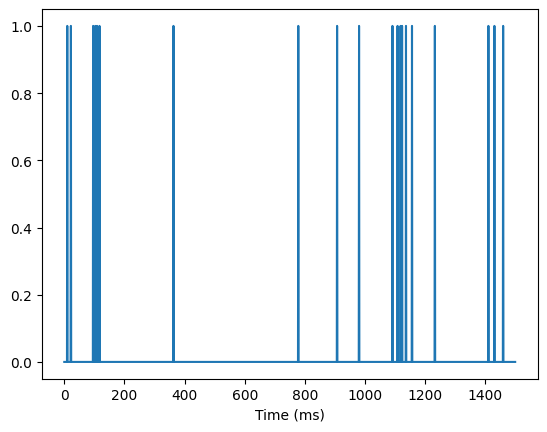

In [62]:
# solution

icell = 0
itrial = 0
plt.plot(spike_counts_LGN[icell,itrial])
plt.xlabel('Time (ms)')

**Exercise**: Plot the spikes in the last trial from the cell at index 3 in **V1**.

In [63]:
# solution


Run the cell below to extract the LFP data recorded in V1 from the dataset and put it in a variable called `lfp_trials`.

In [64]:
lfp_trials = dataset['lfp_trials']
lfp_trials

<xarray.DataArray 'lfp_trials' (channel_depth: 23, trial_stimulus_id: 75,
                                time_from_stimulus_onset_lfp: 1875)> Size: 26MB
array([[[-8.51569421e-06, -1.15631923e-05, -3.76924291e-07, ...,
         -2.17654367e-06,  1.68119712e-07, -6.94200500e-06],
        [ 2.81771330e-08,  6.29403676e-06,  9.98029865e-06, ...,
          1.01304291e-05,  5.93295341e-06,  1.72969475e-05],
        [-1.27271427e-06, -3.68783112e-06, -4.46340366e-06, ...,
          3.65666426e-06,  2.96670978e-06,  1.24568597e-06],
        ...,
        [ 4.70565253e-06,  1.94317598e-06,  1.20455675e-06, ...,
          4.07503496e-06,  7.65054254e-06,  3.91673831e-06],
        [ 8.38144661e-07,  2.28123812e-06,  3.70896321e-06, ...,
          1.34013793e-05,  1.15462596e-05,  8.42411093e-06],
        [ 7.32479652e-06,  1.07711181e-06,  7.00885884e-06, ...,
          1.92065863e-05,  1.92065863e-05,  1.92065863e-05]],

       [[ 3.91952787e-06,  1.70056905e-06,  5.97275690e-06, ...,
          4.06974274e-06,  4.04094749e-06, -4.68055730e-06],
        [-4.10311367e-06,  5.00856269e-06,  6.20500275e-06, ...,
          8.75868311e-06,  5.69604080e-06,  8.57744575e-06],
        [ 1.09646506e-06,  1.62070262e-06,  1.10953040e-07, ...,
          1.01990671e-05, -8.36754580e-06, -1.43387447e-05],
...
        [-6.46738552e-06, -1.19701456e-05, -2.41882630e-05, ...,
         -2.31175915e-05, -2.37374262e-05, -7.53926446e-06],
        [ 2.91850049e-05,  2.81713398e-05,  5.17618757e-05, ...,
          4.44764295e-05,  4.08778688e-05,  3.83233192e-05],
        [-1.80642354e-05, -1.06068608e-05, -3.71177368e-06, ...,
          1.48063260e-05,  1.48063260e-05,  1.48063260e-05]],

       [[ 4.42062699e-05,  5.99208645e-05,  7.60618853e-05, ...,
          9.85508013e-05,  8.87923195e-05,  8.02998878e-05],
        [-6.30930699e-06,  2.14882295e-05,  5.40961203e-06, ...,
         -6.18517313e-05, -8.49961217e-05, -7.07025406e-05],
        [ 1.32347041e-04,  9.66830285e-05,  9.77152893e-05, ...,
         -3.68393584e-05, -2.08663734e-05, -1.27901811e-05],
        ...,
        [ 7.59530363e-07, -9.00525049e-06, -1.95382678e-05, ...,
         -2.78150664e-05, -1.46349189e-05,  3.65395950e-06],
        [ 3.22381374e-05,  3.90163375e-05,  6.39709157e-05, ...,
          5.17422904e-05,  4.94353600e-05,  3.90770304e-05],
        [-2.50190016e-05, -1.82145705e-05, -1.97245214e-05, ...,
          6.13148062e-06,  6.13148062e-06,  6.13148062e-06]]])
Coordinates:
  * channel_depth                 (channel_depth) int64 184B 0 -40 ... -840 -880
  * trial_stimulus_id             (trial_stimulus_id) int32 300B 3649 ... 3796
  * time_from_stimulus_onset_lfp  (time_from_stimulus_onset_lfp) float64 15kB ...

**Exercise**: Plot of the *LFP* trace from the first *channel* in the first trial.

NB: The ticks on the x-axis in this plot will not match the ticks on the x-axis in the plot of spikes above because the spike data and the LFP are sampled at different frequencies. The sampling frequency of the spike data is 1000 Hz while for the LFP it's 1250 Hz, so the ticklabels are not in milliseconds in the LFP plot.

In [65]:
# solution


## Section 2

### Making 2D colormap plots of the LFP using imshow and pcolormesh

| Code | Description |
| :-- | :-- |
| `plt.imshow(data, aspect = 'auto',` <br> &nbsp;&nbsp;&nbsp;&nbsp; `cmap = 'name_colormap',`<br> &nbsp;&nbsp;&nbsp;&nbsp; `vmin = min_val_cmap,`<br> &nbsp;&nbsp;&nbsp;&nbsp; `vmax = max_val_cmap) `| Plots a multidimensional array as an image. `aspect` sets the aspect ratio of the axes. `cmap` sets the colormap.|
| `plt.pcolormesh(x, y, C, ` <br> &nbsp;&nbsp;&nbsp;&nbsp; `cmap = 'name_colormap')` | Make a 2D colormap of values in a 2D array (C) against x and y values. The optional parameters ``cmap`` defines the colormap . |
| `plt.colorbar()` | Adds colorbar to 2D colormap plot. |
| `np.mean(data, axis = (dim_num))` or `data.mean(axis = dim_num)` | Calculate the average of the data across the `dim_num` dimension of the array. |


Run the cell below to extract the lfp data recorded in V1, the sampling frequency of the LFP, and the coordinates (depth) of the channels on the probe in V1 from the dataset.

In [66]:
# extract LFP data

lfp_trials = dataset['lfp_trials']
channels_depth = dataset['channel_depth']
sampling_frequency_lfp = dataset.sampling_frequency_lfp

**Example**: Make a 2D colormap of the LFP in the trial at index 3. The channels should be on the y-axis and the time on the x-axis (though the ticklabels will still show bin number, not milliseconds).

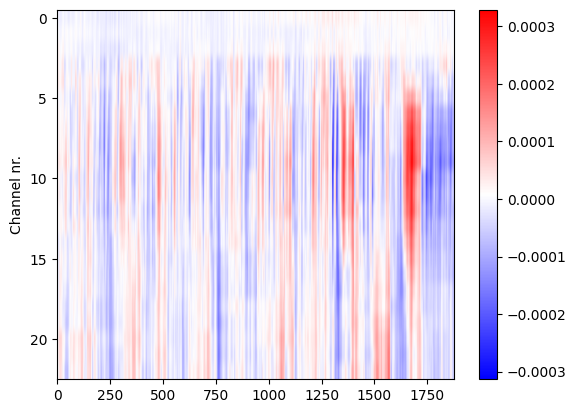

In [67]:
# solution

itrial = 3
plt.imshow(lfp_trials[:,itrial], aspect='auto', cmap='bwr')
plt.ylabel('Channel nr.')
plt.colorbar()

**Exercise**: Make a 2D colormap of the LFP in the *first* trial. The channels should be on the y-axis and the time bins on the x-axis.

In [68]:
# solution


You may have noticed that 0 is not exactly at the midpoint in the colorbar above. That can be set with the parameters `vmin` and `vmax` in the `imshow` function, which sets the minimum and maximum value of the colormap.

**Exercise**: Make a 2D colormap of the LFP in the first trial again, but set the `vmin` and `vmax` parameters to the same value with opposite signs (i.e. ``vmin = -some_value`` and ``vmax = some_value``) to ensure that the midpoint of the colorbar is exactly at 0.

In [69]:
# solution


**Exercise**: Calculate the trial averaged LFP and make a 2D colormap of it. Remember that the trials are on the second dimension when you compute the trial average.

The stimulus onset is 1000 ms after the trial start, which will be at the x-tick 1250 in this plot because of the sampling frequency. Do you see a clear stimulus response around this time?

In [70]:
# solution


The `lfp_trials` variable has a coordinate `time_from_stimulus_onset_lfp` which contains the time points at which the LFP was sampled. Run the cell below the get these time points from the `lfp_trials` variable.

In [71]:
time_from_stimulus_onset_lfp = lfp_trials.time_from_stimulus_onset_lfp

time_from_stimulus_onset_lfp

<xarray.DataArray 'time_from_stimulus_onset_lfp' (
                                                  time_from_stimulus_onset_lfp: 1875)> Size: 15kB
array([-1000. ,  -999.2,  -998.4, ...,   497.6,   498.4,   499.2])
Coordinates:
  * time_from_stimulus_onset_lfp  (time_from_stimulus_onset_lfp) float64 15kB ...

There is another function that can be used to make 2D colormaps that can automatically set the ticklabels on the x- and y-axis to the units you want. It's called `pcolormesh`, and if you, for example, pass an array containing time points as the first parameter and an array containing positions as the second parameter, the ticklabels on the x-axis will be in time units and the ticklabels on the y-axis will be in spatial units.

**Example**: Make a 2D colormap of the trial averaged LFP with time on the x-axis and channel depth on the y-axis using `plt.pcolormesh`.

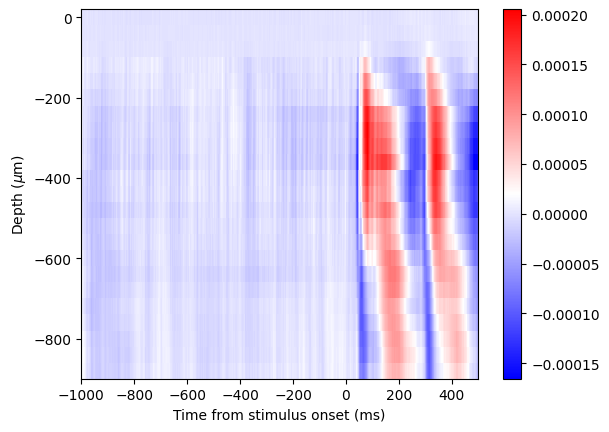

In [72]:
# solution

lfp_trial_avg = np.mean(lfp_trials, axis = 1)

plt.pcolormesh(time_from_stimulus_onset_lfp, channels_depth, lfp_trial_avg, cmap = 'bwr')
plt.xlabel('Time from stimulus onset (ms)')
plt.ylabel(r'Depth ($\mu$m)')
plt.colorbar()

**Exercise**: Make a 2D colormap of the LFP in the first trial with time on the x-axis and channel depth on the y-axis using `plt.pcolormesh`.

In [73]:
# solution


**Exercise**: Make a 2D colormap of the LFP in the trial at index 10 with time on the x-axis and channel depth on the y-axis using `plt.pcolormesh`. This time, set the `vmin` and `vmax` parameters too so that the midpoint of the colorbar is exactly at 0.

In [74]:
# solution


The units of the LFP is Volt (V). Since the numbers are quite small, it can be more practical to use millivolt (mV) instead.

**Exercise**: Plot the trial averaged LFP with ``plt.pcolormesh`` again but multiply the LFP with a 1000 before you plot it so that its unit is millivolt. Include a colorbar to check that the scale of the colorbar is now (approximately) -0.2 to 0.2.

In [75]:
# solution


## Section 3

### Selecting and plotting time windows of data

We're often interested in looking more closely at the data in specific periods of a trial or recording period. To select the data from those periods, it's practical to use logical indexing, or masks with boolean values in other words, to filter a data array for the parts we want to focus on.

| Code | Description |
| :-- | :-- |
| `mask = x<=1     ` | Create a `mask` that is `True` where `x` is smaller than or equal to `1` and `False` otherwise |
| `mask = x=="k"` | Create a `mask` that is `True` where `x` is equal to `"k"` and `False` otherwise |
| `mask = x>1` | Create a `mask` that is `True` where `x` is greater than `1` and `False` otherwise |
| `mask = (x >= 10) & `<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`(x < 100)` | Create a `mask` that is `True` where `x` is greater than or equal to `10` <br>  and at the same time smaller than a ``100`` and `False` otherwise |
| `x[mask]` | Get all elements of `x` where the `mask` is `True` |
| `plt.plot(x, y, label="label1")` | Add the label `"label1"` to the plotted data |
| `plt.legend()` | Add a legend that displays the labels in the plot |
| `plt.xlabel("xval")` | Label the x-axis with `"xval"` |
| `plt.ylabel("yval")` | Label the y-axis with `"yval"` |
| `plt.title("titleval")` | Add a title `"yval"` to the plot |


**Example**: Get the trial averaged LFP from 100 ms *before* stimulus onset and to the end of the trial and plot it with a 2D colormap.

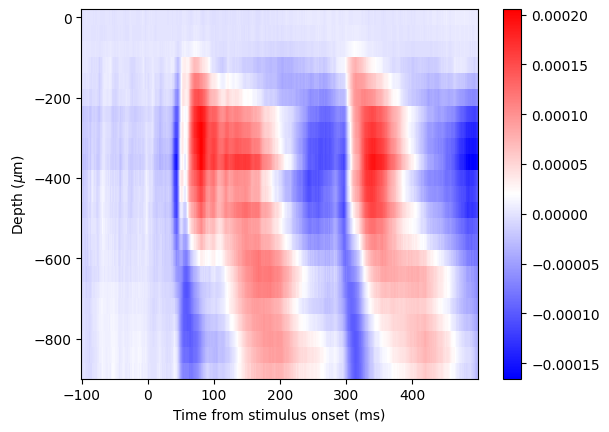

In [76]:
# solution

time_window_start = -100
time_window_end = 500

mask_time_window_lfp = (time_from_stimulus_onset_lfp > time_window_start) & \
                        (time_from_stimulus_onset_lfp < time_window_end)

lfp_trial_avg_window = lfp_trial_avg[:, mask_time_window_lfp]
times_in_window = time_from_stimulus_onset_lfp[mask_time_window_lfp]

plt.pcolormesh(times_in_window, channels_depth, lfp_trial_avg_window, cmap='bwr')
plt.xlabel('Time from stimulus onset (ms)')
plt.ylabel(r'Depth ($\mu$m)')
plt.colorbar();

**Exercise**: Get the trial averaged LFP from stimulus onset and to the stimulus offset (which is 250 ms after onset) and plot it.

In [77]:
# solution


**Exercise**: Get the trial averaged LFP from stimulus onset to 100 ms after stimulus onset and plot it. At how many milliseconds after stimulus onset do you see a clear response?

In [78]:
# solution


**Example**: Get the trial averaged LFP from stimulus onset to 100 ms after stimulus onset and plot the trace channel index 5 and channel index 22 together in a 1D plot.

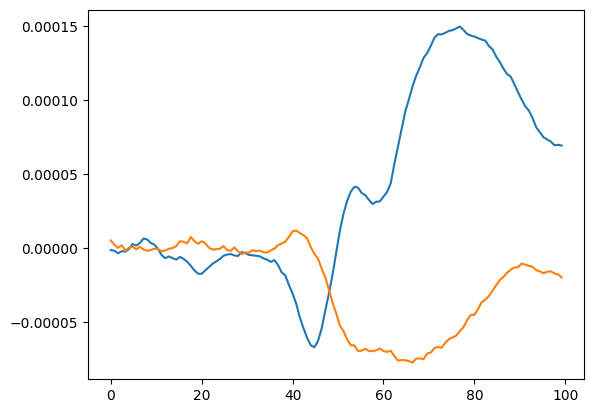

In [79]:
# solution

time_window_start = 0
time_window_end = 100

mask_time_window_lfp = (time_from_stimulus_onset_lfp > time_window_start) & \
                        (time_from_stimulus_onset_lfp < time_window_end)


lfp_trial_avg_window = lfp_trial_avg[:, mask_time_window_lfp]
times_in_window = time_from_stimulus_onset_lfp[mask_time_window_lfp]

ichan1 = 5
ichan2 = 22

plt.plot(times_in_window, lfp_trial_avg_window[ichan1])
plt.plot(times_in_window, lfp_trial_avg_window[ichan2]);

**Exercise**: Plot the LFP traces in the same time window for channel 0 and channel 15. Do the amplitudes of the traces match what you would expect from looking at the 2D colormaps you made above?

In [80]:
# solution


**Exercise**: Plot the same LFP traces but add labels to the traces and show the legend.

In [81]:
# solution


**Exercise**: Plot the same LFP traces and add labels to the x-axis and y-axis and a title.

In [82]:
# solution


## Section 4

### Creating figures with multiple subplots and plot behavioral data

Sometimes, we want to compare LFP data from different trials or spikes from different cells. By making figures with subplots, we can easily compare the different parts of the data side by side. The subplots can be stacked on top of each other in different rows or shown next to each other in different columns. And you can combine having multiple rows and multiple columns in a grid of subplots in the same figure.

| Code | Description |
| :-- | :-- |
| `fig, ax = plt.subplots(nrows, ncols)` | Tells python to create a grid of subplots with `nrows` number of rows and `ncols` number of columns. `ax` can be indexed to refer to a specific subplot, f.ex. the subplot on the first row and second column would be `ax[0,1]`.|
| `data.values` | Gets the data from an xarray data variable as a numpy array.|


The `spike_counts_LGN` variable has a coordinate `time_from_stimulus_onset_spikes` which contains the time points for the spike bins. Run the cell below the get these time points from the `spike_counts_LGN` variable. (The time points will be the same for the spikes in V1 and LM.)

In [83]:
time_from_stimulus_onset_spikes = spike_counts_LGN.time_from_stimulus_onset_spikes

**Example**: Create a figure with two subplots side by side (``ncols = 2``) where the first subplot shows the spike count of the first cell in LGN in the first trial and the second subplot shows the second trial.

In [84]:
# solution


**Exercise**: Create a figure with two subplots on top of each other (``nrows = 2``) where the first subplot shows the spike count of the first cell in LGN in the first trial and the second subplot shows the second trial.

In [85]:
# solution

**Exercise**: Create a figure with four subplots - two rows and two columns (``ncols = 2`` and ``nrows = 2``). Plot the spikes in trial 0 for the first four LGN cells each in their separate subplot.

In [86]:
# solution


The spike counts and the LFP data are stored as ``xarray`` DataArrays. Not all functions will allow you to pass a DataArray as an argument, but they will usually accept a ``numpy`` array. You can get the data in a DataArray as a numpy array simply by typing ``.values`` behind the DataArray.

**Example**: Get the spike count data from LGN as a numpy array. You should just see an array with a bunch of zeros and maybe one or two 1's, and nothing else.

In [87]:
spike_counts_LGN.values

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

**Exercise**: Get the LFP data from all trials as a numpy array.

In [88]:
# solution


#### Extract data

Run the two cells below to extract the behavioral data - the average running speed and the average pupil width in each trial.

In [89]:
avg_run_speed = dataset['run_speed']
avg_run_speed


<xarray.DataArray 'run_speed' (trial_nr: 75)> Size: 600B
array([ 1.15461545,  1.59668837,  6.056658  ,  5.15987544,  8.52760497,
       11.22847943,  4.57915849,  3.55552612,  1.21703267,  1.14123532,
        1.22313026,  1.45219009,  1.27881682,  1.28545771,  1.30252225,
        1.45938978,  1.23683681,  1.35499306,  1.24373061,  1.72814998,
        1.10057218,  1.12037113,  1.0171456 ,  1.12698213,  1.23746278,
        1.0051122 ,  1.22995347,  1.18035543,  1.33973747,  1.31655126,
        1.42316228,  1.16454631,  1.1175898 ,  1.33965127,  1.44008401,
        1.27856107,  1.08369774,  1.2852668 ,  1.22042713,  0.93635542,
        1.10224883,  1.3656531 ,  1.14346642,  1.34443297,  1.27934364,
        1.22477016,  0.89182778,  1.08752668,  1.29883034,  1.38104512,
        0.96683534,  1.19810534,  0.99052094,  0.9343001 ,  1.71404147,
        1.51968473,  1.23845685,  0.84848258,  1.59605601,  1.25635954,
        1.22987165,  1.64782276,  1.75731669,  1.67665638,  1.42473997,
        1.02886151,  5.65275275,  8.34342969,  9.03230058, 10.64468513,
        8.17371765,  1.18762197,  1.36400808,  1.25093511,  1.71061779])
Coordinates:
  * trial_nr  (trial_nr) int32 300B 0 1 2 3 4 5 6 7 ... 67 68 69 70 71 72 73 74

In [90]:
avg_pupil_width = dataset['pupil_width']
avg_pupil_width

<xarray.DataArray 'pupil_width' (trial_nr: 75)> Size: 600B
array([39.11652012, 40.53014519, 53.86896327, 50.82396045, 52.16879212,
       57.96043078, 54.92497335, 55.54967205, 43.90274746, 44.79854897,
       38.38702834, 40.71644189, 37.98256784, 35.66463223, 33.77803219,
       37.33170246, 34.40298455, 33.56487003, 34.8366242 , 34.23566353,
       37.82023369, 36.64031488, 34.90016986, 34.01127022, 34.01676223,
       33.07691675, 36.24898149, 34.31897366, 32.37205121, 32.29131936,
       31.22026173, 32.11667831, 35.9407955 , 33.83439488, 40.32179372,
       40.2773362 , 36.8416765 , 38.28154173, 32.92621992, 34.10611125,
       32.64213782, 35.34716687, 38.83240189, 41.4527341 , 40.80453453,
       34.4518716 , 33.54378434, 34.76110284, 39.39896604, 38.12986388,
       35.01399576, 36.1764032 , 36.91026669, 38.09285533, 37.47092614,
       35.08431869, 34.10750204, 33.98908271, 33.49633874, 31.95082717,
       36.40762283, 33.54301125, 30.16956358, 34.97767163, 35.73862834,
       37.5021579 , 46.90415398, 64.55582159, 65.24024526, 62.84832274,
       63.79648979, 64.1050437 , 54.12537803, 46.57182176, 44.30600894])
Coordinates:
  * trial_nr  (trial_nr) int32 300B 0 1 2 3 4 5 6 7 ... 67 68 69 70 71 72 73 74

**Exercise**: Plot the average running speed. The x-axis will be the trial number

In [91]:
# solution


**Exercise**: Plot the average pupil width. Do you notice anything when you compare this plot to the plot of the running speed?

In [92]:
# solution
